# Setup #

In [1]:
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit import IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')

import os

# Detection algorithm works with an NxN matrix
N = 8
#N is a power of 2

# Helper Functions #

In [2]:
def plot_image(img, title: str):
    plt.title(title)
    #plt.xticks(range(img.shape[0]))
    #plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()

In [3]:
#Normalize -- squared amplitudes must sum to 1
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)

# Image Preprocessing #

Raw Image info: (512, 512, 3)
Raw Image datatype: uint8


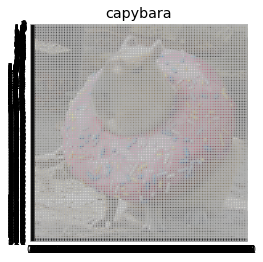

In [12]:
#Input Processing to np array

img_raw = plt.imread(os.path.join("test_images", "squarecapybara.jpg"))
# img_raw = plt.imread('/test_images/test_image1.jpg')

n, m, k = img_raw.shape
print('Raw Image info:', img_raw.shape)
print('Raw Image datatype:', img_raw.dtype)

if n != m:
    raise Exception("Image must be square")

if n % N != 0:
    raise Exception(f"Image cannot be converted to an {N} by {N} matrix")

# we need to "reduce" each sz X sz grid
sz = n // N

img = np.zeros(shape=(n, n))

for i in range(0, n, sz):
    for j in range(0, n, sz):
        #This will be a single cell in final pixel
        val = np.sum(img_raw[i:i+sz][j:j+sz]) / (sz * sz)
        img[i][j] = val

plot_image(img_raw, "capybara")

In [ ]:
# Horizontal: Original image
image_norm_h = amplitude_encode(image)

# Vertical: Transpose of Original image
image_norm_v = amplitude_encode(image.T)